In [3]:
import pickle
import glob
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import random
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [4]:
# To run on GPU
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [5]:
# Fetch all the files from the image folder
files = glob.glob('images/**')
print(files)
dictval={}
i = 0

# Iterate over every file and try to save data to the dictval
for file in files:
    print(file)
    if "batches.meta" in file:
        # batches.meta contains the data for the label names 
        # and size of the batch
        with open(file,'rb') as fo:
            data = pickle.load(fo, encoding='bytes')
            print(data)
    else:
        with open(file, 'rb') as fo:
            temp = pickle.load(fo, encoding='bytes')
            #print(temp)
            if i == 0:
                dictval['data']= list(temp[b'data'])
                dictval['labels']= list(temp[b'labels'])
            else:
                dictval['data'] = dictval['data'] + list(temp[b'data'])
                dictval['labels'] = dictval['labels'] + list(temp[b'labels'])
            i+=1


['images\\batches.meta', 'images\\data_batch_1', 'images\\data_batch_2', 'images\\data_batch_3', 'images\\data_batch_4', 'images\\data_batch_5']
images\batches.meta
{b'num_cases_per_batch': 10000, b'label_names': [b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck'], b'num_vis': 3072}
images\data_batch_1
images\data_batch_2
images\data_batch_3
images\data_batch_4
images\data_batch_5


In [14]:
# Convert the bytes to the normal string
print(data[b'label_names'])
labels = [x.decode('utf-8') for x in data[b'label_names']] 
print(labels)

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


50000


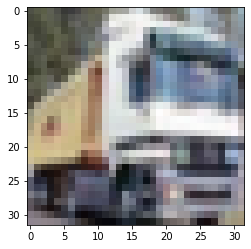

truck


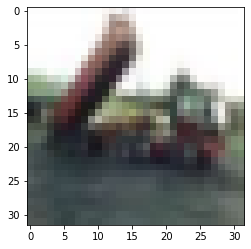

truck


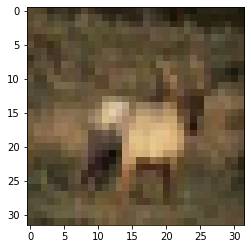

deer


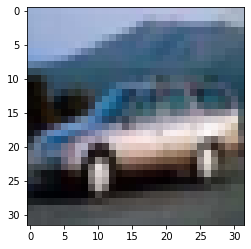

automobile


In [19]:
alldata = dictval['data']
alldatalabels = dictval['labels']
trainingdata = []
def create_training_data():
    def reshapedata(imdata, imlabel):
        print(len(imdata))
#         for i  in range(0,len(imdata)):
        for i  in range(1,5):
            # This data is the in the format of 3072 array elements
            temp = imdata[i]
            #print(temp)
            #print(len(temp))
            
            # To reshape the data
            img = np.reshape(temp, (3, 32,32)).T
            #print(img.shape)
            
            # Convert the numpy array into the RGB format
            img = Image.fromarray(img, 'RGB')
            
            # To see the image without correct orientation
            #plt.imshow(img)
            #plt.show()
            
            # img is in rotated format, so we need to rotate the image
            # to get the original orientation
            img = img.rotate(270)
            
            # Here gray conversion is done: in our application color images are not need because we 
            # can get the same information in the gray image. 
            # Benefit of using gray image : It will reduce the calculations by 3(RGB have 3 channels)
            img  = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
            img  = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
            
            # Just to make sure that every image is 32*32
#             img = cv2.resize(img, (32,32, 3))
            
            # To see the image in the correct orientation
#             plt.imshow(img)
#             plt.show()
            
            
            # Just to verify that every label is int
            if type(imlabel[i]) != type(2):
                continue
                
            # Stored the labels in another variable
            class_num = imlabel[i]
            
#             print(labels[class_num])
#             break
            # To create training data: 
            # I have appened the image data and the label
            # temp[0]: This is image
            # temp[1]: This is label
            temp  = [img, class_num]
            trainingdata.append(temp)
            #break
    reshapedata(alldata, alldatalabels)
create_training_data()



In [8]:
# This is to make the data shuffled randomly
import random
random.shuffle(trainingdata)

In [9]:
# This is just to check whether every data is 
# append correctly or not.
for sample in trainingdata[:10]:
    print("label = %d" %sample[1])

X = []
Y = []
# This is to store all the images in X
# and all the labels in Y
for features, label in trainingdata:
    X.append(features)
    Y.append(label)
# To reshape informat of tensorflow
X = np.array(X).reshape(-1,32, 32, 1)
print(X.shape)


label = 1
label = 3
label = 5
label = 0
label = 3
label = 3
label = 0
label = 0
label = 6
label = 6
(50000, 32, 32, 1)


In [10]:
#X = pickle.load(open("X.pickle", 'rb'))
#Y = pickle.load(open("Y.pickle", 'rb'))

# to normalize the data. 
X = X/255.0

# 60% Training data
x_train = X[:30000]
y_train = Y[:30000]

# 20% Testing data
x_test = X[30000:40000]
y_test = Y[30000:40000]

# 20% Validation data
x_val = X[40000:50000]
y_val = Y[40000:50000]


In [11]:
# Model initialization 
model = Sequential()
model.add(Conv2D(256, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))

model.add(Conv2D(128, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))

# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))

# model.add(Conv2D(32,(3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))

model.add(Flatten())
# model.add(Dense(256))
# model.add(Activation("relu"))
# model.add(Dense(256))
# model.add(Activation("relu"))
model.add(Dense(192))
model.add(Activation("relu"))
model.add(Dense(128))
model.add(Activation("relu"))


# model.add(Dense(30))
# model.add(Activation("relu"))
# model.add(Dense(20))
# model.add(Activation("relu"))
# Output layers
model.add(Dense(10))
# Here we will get the outputs in probability 
model.add(Activation("softmax"))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
# Model compilation is done
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# Here we are going to train the model
model.fit(x_train, y_train,batch_size=100, validation_data=(x_val, y_val), epochs = 10)
 

Train on 30000 samples, validate on 10000 samples
Epoch 1/10
30000/30000 [==============================] - 30s 1ms/sample - loss: 1.8076 - acc: 0.3414 - val_loss: 1.5916 - val_acc: 0.4351
Epoch 2/10
30000/30000 [==============================] - 28s 939us/sample - loss: 1.4525 - acc: 0.4864 - val_loss: 1.4136 - val_acc: 0.5066
Epoch 3/10
30000/30000 [==============================] - 28s 934us/sample - loss: 1.2506 - acc: 0.5593 - val_loss: 1.3174 - val_acc: 0.5435
Epoch 4/10
30000/30000 [==============================] - 28s 933us/sample - loss: 1.0673 - acc: 0.6261 - val_loss: 1.3245 - val_acc: 0.5544
Epoch 5/10
30000/30000 [==============================] - 28s 927us/sample - loss: 0.8929 - acc: 0.6905 - val_loss: 1.2908 - val_acc: 0.5611
Epoch 6/10
30000/30000 [==============================] - 27s 905us/sample - loss: 0.7064 - acc: 0.7550 - val_loss: 1.4040 - val_acc: 0.5640
Epoch 7/10
30000/30000 [==============================] - 27s 901us/sample - loss: 0.5385 - acc: 0.8152 - 

In [13]:
# To find the test accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 4s 376us/sample - loss: 2.4350 - acc: 0.5379


In [ ]:
model.save('ourmodel.h5')
saved_model = tf.keras.models.load_model('ourmodel.h5')

In [ ]:
y_pred = saved_model.predict(x_test)

In [ ]:
print(y_pred[8])

In [ ]:
predval = 105
count = 0
for i in range(len(y_pred)):
    if np.argmax(y_pred[i]) == y_test[i]:
        count +=1
accuracy = count/len(y_pred)
print(accuracy)
# print(np.argmax(y_pred[predval]))
# print(y_test[predval])